# Healthcare Dataset Analysis
This notebook performs preprocessing, analysis, and visualization tasks.

Source: https://www.kaggle.com/datasets/prasad22/healthcare-dataset

## Load Dataset

Loading the dataset

In [79]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("healthcare_dataset.csv")

df = df.sample(n = 30000, random_state = 42)

# Display basic information about the dataset
df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 31641 to 35916
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                30000 non-null  object 
 1   Age                 30000 non-null  int64  
 2   Gender              30000 non-null  object 
 3   Blood Type          30000 non-null  object 
 4   Medical Condition   30000 non-null  object 
 5   Date of Admission   30000 non-null  object 
 6   Doctor              30000 non-null  object 
 7   Hospital            30000 non-null  object 
 8   Insurance Provider  30000 non-null  object 
 9   Billing Amount      30000 non-null  float64
 10  Room Number         30000 non-null  int64  
 11  Admission Type      30000 non-null  object 
 12  Discharge Date      30000 non-null  object 
 13  Medication          30000 non-null  object 
 14  Test Results        30000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 3.7+

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,30000,30000.000000,30000,30000,30000,30000,30000,30000,30000,30000.000000,30000.000000,30000,30000,30000,30000
unique,28328,NaN,2,8,6,1827,24571,23931,5,NaN,NaN,3,1855,5,3
top,RIcKY JOHNSoN,NaN,Male,AB+,Arthritis,2023-08-10,Michael Smith,LLC Smith,Cigna,NaN,NaN,Urgent,2022-02-25,Aspirin,Abnormal
freq,2,NaN,15000,3780,5085,33,15,28,6053,NaN,NaN,10029,34,6114,10050
mean,NaN,51.542800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25450.014734,300.936400,NaN,NaN,NaN,NaN
std,NaN,19.652794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14192.878866,115.298117,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1660.009373,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13200.239841,201.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25425.727863,303.000000,NaN,NaN,NaN,NaN
75%,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37628.877377,400.000000,NaN,NaN,NaN,NaN


## Preprocessing

Python code to implement a data-cleaning pipeline with five cleaning functions.

### Helper function for changed rows
Helper to show changed rows.

In [80]:
def show_changed_rows(df_before, df_after, description, question_type):
    if question_type == True:
        """Print FIRST 10 rows that differ between df_before and df_after."""
        diff_mask = (df_before != df_after) & ~(df_before.isna() & df_after.isna())
        changed_idx = diff_mask.any(axis=1)
        changed_rows = df_after.loc[changed_idx]

        print(f"\n=== Rows changed by: {description} (showing FIRST 10 changed rows) ===")
        if changed_rows.empty:
            print("No rows were changed in the main dataset.")
        else:
            display(changed_rows.head(10))

        return changed_rows
    
    else:
        """Print ALL rows that differ between df_before and df_after."""
        diff_mask = (df_before != df_after) & ~(df_before.isna() & df_after.isna())
        changed_idx = diff_mask.any(axis=1)
        changed_rows = df_after.loc[changed_idx]

        print(f"\n=== Rows changed by: {description} (showing ALL changed rows) ===")
        if changed_rows.empty:
            print("No rows were changed in the main dataset.")
        else:
            display(changed_rows)
        return changed_rows

### Handle missing values

In [81]:
df_before_missing = df.copy()

def handle_missing_values(df_input):
    # Work on a copy to avoid modifying in place accidentally
    df_local = df_input.copy()
    
    # Determine numeric and categorical columns for THIS dataframe
    numeric_cols = df_local.select_dtypes(include=[np.number]).columns
    categorical_cols = df_local.select_dtypes(exclude=[np.number]).columns
    
    # Fill numeric with median
    for col in numeric_cols:
        if df_local[col].isna().any():
            median_val = df_local[col].median()
            df_local[col] = df_local[col].fillna(median_val)
    
    # Fill categorical with mode
    for col in categorical_cols:
        if df_local[col].isna().any():
            mode_val = df_local[col].mode()
            if not mode_val.empty:
                df_local[col] = df_local[col].fillna(mode_val[0])
    
    return df_local

# Apply to main dataset
df = handle_missing_values(df)
changed_rows_missing = show_changed_rows(df_before_missing, df, "Handle missing values", False)

# If no changes, demonstrate on a small example
if changed_rows_missing.empty:
    print("\nNo missing values in main dataset; demonstrating on a made-up example:")
    example = pd.DataFrame({
        "Age": [25, np.nan, 40, 35, np.nan],
        "Gender": ["Male", "Female", None, "Female", "Male"]
    })
    print("Example BEFORE:")
    display(example)
    
    example_clean = handle_missing_values(example)
    print("Example AFTER:")
    display(example_clean)


=== Rows changed by: Handle missing values (showing ALL changed rows) ===
No rows were changed in the main dataset.

No missing values in main dataset; demonstrating on a made-up example:
Example BEFORE:


,Age,Gender
0,25.0,Male
1,NaN,Female
2,40.0,None
3,35.0,Female
4,NaN,Male


Example AFTER:


,Age,Gender
0,25.0,Male
1,35.0,Female
2,40.0,Female
3,35.0,Female
4,35.0,Male


### Remove duplicates from the dataset

In [82]:
df_before_dups = df.copy()

def remove_duplicates_and_get_removed(df_input):
    df_local = df_input.copy()
    
    # True for rows that are duplicates of a previous row
    dup_mask = df_local.duplicated()
    
    removed_rows = df_local[dup_mask].copy()
    
    before = len(df_local)
    df_clean = df_local.drop_duplicates()
    after = len(df_clean)
    
    print(f"Removed {before - after} duplicate rows.")
    return df_clean, removed_rows

df, removed_dup_rows = remove_duplicates_and_get_removed(df_before_dups)

print("\nRows removed as duplicates:")
if removed_dup_rows.empty:
    print("\nNo duplicates in main dataset; demonstrating on a made-up example:")
    example_dup = pd.DataFrame({
        "Patient_ID": [1, 2, 2, 3, 3],
        "Age": [30, 40, 40, 50, 50]
    })
    print("Example BEFORE:")
    display(example_dup)
    example_clean = remove_duplicates_and_get_removed(example_dup)
    print("Example AFTER:")
    display(example_clean)
    print("No duplicate rows were found in the main dataset.")
else:
    display(removed_dup_rows)

Removed 159 duplicate rows.

Rows removed as duplicates:


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
16224,kENNETh hUBbARd,82,Male,AB+,Hypertension,2021-11-12,Blake Cortez,Rice-Roberts,Medicare,17894.517815,104,Emergency,2021-12-03,Aspirin,Normal
50924,liNdsey MaSoN,79,Female,O+,Obesity,2021-04-11,Joseph Steele,Inc Thomas,Blue Cross,38065.791428,261,Elective,2021-04-28,Lipitor,Inconclusive
54648,aLlisON McclAiN,33,Male,O-,Diabetes,2022-07-15,Robert Thompson,"Garcia, and Reyes Carey",Medicare,43591.387462,388,Emergency,2022-08-14,Lipitor,Normal
51396,DEBbIe kIm,51,Female,A-,Obesity,2023-11-21,Johnny Bryan,Reyes-Warren,Blue Cross,40461.170560,223,Elective,2023-12-19,Lipitor,Normal
54235,MATtHew WriGht,19,Female,B+,Diabetes,2022-02-17,Anita Parrish,Sons and Lucero,Cigna,13678.167229,141,Emergency,2022-03-19,Lipitor,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14739,JEfFreY wILliAMS,69,Female,B+,Hypertension,2021-06-02,Jill Wilcox,Monroe-Mcclure,Cigna,39518.504215,336,Emergency,2021-06-15,Lipitor,Normal
50216,MaRiA PRATT,69,Male,AB-,Arthritis,2022-07-27,Rebecca Hawkins,"Fisher and Cain Ross,",Cigna,23730.567547,194,Urgent,2022-08-04,Ibuprofen,Abnormal
20042,cOdy mOsS,29,Female,AB+,Cancer,2024-02-24,Randall Palmer,"and Moore, Johnson Curry",Medicare,25615.886666,344,Emergency,2024-03-02,Aspirin,Abnormal
37417,gregOry KiNg,52,Female,B-,Diabetes,2021-11-17,Andre Williams,Johnson PLC,UnitedHealthcare,2725.380977,299,Elective,2021-12-09,Paracetamol,Inconclusive


### Handle values that are invalid for the expected type and range.
Handle invalid ages and billing amounts. 0 > Age or Age > 120 and Billing Amounts < 0

In [83]:
df_before_invalid = df.copy()

def handle_invalid_values(df):
    df = df.copy()
    
    # Age: should be between 0 and 120
    invalid_age_mask = (df["Age"] < 0) | (df["Age"] > 120)
    df.loc[invalid_age_mask, "Age"] = np.nan
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Age"] = np.floor(df["Age"]).astype(int)
    
    # Billing_Amount: should be >= 0
    invalid_bill_mask = df["Billing Amount"] < 0
    df.loc[invalid_bill_mask, "Billing Amount"] = np.nan
    df["Billing Amount"] = df["Billing Amount"].fillna(df["Billing Amount"].median())
    
    return df

df = handle_invalid_values(df)
changed_rows_invalid = show_changed_rows(df_before_invalid, df, "Handle invalid ranges", False)

num_modified = len(changed_rows_invalid)
print(f"\nRows modified due to invalid values: {num_modified}")

if changed_rows_invalid.empty:
    print("\nNo invalid values in main dataset; demonstrating on made-up example:")
    example_inv = pd.DataFrame({
        "Age": [25, -5, 200, 40, -130],
        "Billing Amount": [1000, -50, 500, -10, 300]
    })
    print("Example BEFORE:")
    display(example_inv)
    example_clean = handle_invalid_values(example_inv)
    print("Example AFTER:")
    display(example_clean)


=== Rows changed by: Handle invalid ranges (showing ALL changed rows) ===


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
46987,joHn HArriS,50,Male,A-,Asthma,2019-11-27,Robert Moreno,Weiss-Mills,Medicare,25488.199476,434,Urgent,2019-12-14,Penicillin,Inconclusive
34304,aLExanDeR MArTiN,46,Male,A+,Hypertension,2021-09-24,Tracy Smith,"Carter, and Nguyen Snow",UnitedHealthcare,25488.199476,401,Emergency,2021-09-26,Lipitor,Inconclusive
48044,wAnDa CHaSE,60,Male,O-,Hypertension,2021-03-26,Justin Gibbs,"Jimenez and Ross Mason,",Medicare,25488.199476,357,Emergency,2021-04-12,Lipitor,Inconclusive
43641,lISa KEllEY,29,Female,O-,Cancer,2019-12-30,David Clarke,Phillips Ltd,UnitedHealthcare,25488.199476,115,Elective,2020-01-03,Penicillin,Inconclusive
39300,joSEPH StEveNs,75,Female,O+,Obesity,2023-01-30,John Watson,Schneider and Sons,Cigna,25488.199476,476,Elective,2023-02-13,Ibuprofen,Normal
12074,BRiAN YOuNg,85,Male,O-,Cancer,2021-04-13,Dr. Jenna Caldwell,Hampton LLC,Cigna,25488.199476,133,Emergency,2021-04-20,Aspirin,Abnormal
50694,tHoMas PrAtt,61,Female,A+,Obesity,2021-03-27,Eduardo Hall,"and Wade, Huffman Arnold",Medicare,25488.199476,496,Emergency,2021-04-22,Paracetamol,Inconclusive
43392,DR. micHaEl MckAy,67,Male,O+,Cancer,2019-05-31,Dawn Navarro,"Mcconnell and Rios, Clark",UnitedHealthcare,25488.199476,122,Urgent,2019-06-12,Ibuprofen,Abnormal
41027,SUSAn ELlisOn,60,Female,B-,Asthma,2022-08-28,Vincent Cox,Johnson-Todd,Medicare,25488.199476,365,Urgent,2022-09-08,Aspirin,Abnormal
42621,joHn hahN,80,Male,O-,Asthma,2024-02-24,Mark Hines,Ltd Wilson,Cigna,25488.199476,403,Elective,2024-03-14,Lipitor,Abnormal



Rows modified due to invalid values: 55


### Uniform case standardization for text (decide and apply lower/upper consistently; trim whitespace).
Standarizing the name column. Lowercase + strip

In [84]:
df_before_name = df.copy()

def standardize_name_column(df_input):
    df_local = df_input.copy()
    
    if "Name" in df_local.columns:
        # lowercase + strip whitespace
        df_local["Name"] = (
            df_local["Name"]
            .astype(str)
            .str.strip()
            .str.lower()
        )
    else:
        print("Column 'Name' not found.")
    
    return df_local

# Apply cleaning
df = standardize_name_column(df)

# Show changed rows using the helper function
changed_rows_name = show_changed_rows(df_before_name, df, "Standardize Name column (lowercase)", True)

if changed_rows_name.empty:
    print("\nNo invalid values in main dataset; demonstrating on made-up example:")
    example_inv = pd.DataFrame({
        "Name": ["bobby jackson", "LeSLie TerrY", "DANNY SMITH", "Andrew Watts", "sara connor"]
    })
    print("Example BEFORE:")
    display(example_inv)
    example_clean = standardize_name_column(example_inv)
    print("Example AFTER:")
    display(example_clean)


=== Rows changed by: Standardize Name column (lowercase) (showing FIRST 10 changed rows) ===


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
31641,michael thornton md,57,Male,O+,Diabetes,2023-09-15,Jason Hanson,Thornton-Roy,Medicare,3616.898450,339,Elective,2023-10-02,Aspirin,Inconclusive
9246,matthew hutchinson,51,Female,A+,Diabetes,2023-10-07,Jesse Gonzalez,Wilkerson-Lewis,Aetna,36970.075481,372,Emergency,2023-10-14,Penicillin,Abnormal
1583,ronald park,20,Male,A+,Asthma,2019-09-09,Sarah Hernandez,Brown-Hughes,Blue Cross,44393.001348,148,Elective,2019-10-08,Penicillin,Inconclusive
36506,jeff brooks,74,Female,B+,Obesity,2020-09-14,Cathy Sanchez,"Wilson, Alexander Wolf and",Aetna,27554.923708,135,Emergency,2020-09-21,Ibuprofen,Abnormal
11259,tanya thompson,56,Male,AB-,Obesity,2023-02-01,Nancy Lee,"Winters, Blackburn Chandler and",Aetna,27466.318567,284,Emergency,2023-02-07,Paracetamol,Inconclusive
8972,ethan mitchell,46,Male,B+,Cancer,2021-12-30,Christina Hart,Rocha-Wagner,Medicare,4802.620714,175,Elective,2022-01-27,Paracetamol,Abnormal
36078,amber wright,44,Female,O+,Asthma,2023-05-13,Melissa Stephens,Friedman-Douglas,Blue Cross,40207.463218,336,Elective,2023-06-09,Paracetamol,Inconclusive
42659,morgan lawrence,46,Male,B-,Diabetes,2023-06-20,Paul Hansen,"Wells and Davila Cooper,",Medicare,30065.260598,212,Elective,2023-07-16,Ibuprofen,Abnormal
6545,mackenzie maxwell,64,Female,AB-,Arthritis,2019-08-03,Thomas Pratt,"and Alvarez, Cox Powers",Cigna,392.913548,113,Urgent,2019-08-15,Ibuprofen,Inconclusive
35448,cindy rogers,68,Male,B-,Cancer,2022-03-15,Calvin George,"Conley Jackson, and Hill",Medicare,20886.342148,274,Urgent,2022-04-14,Penicillin,Normal


### Normalize mixed-format dates to a single standard : YYYY-MM-DD.

In [85]:
df_before_dates = df.copy()

def normalize_date_columns(df_input, date_cols):
    df_local = df_input.copy()

    for col in date_cols:
        if col in df_local.columns:
            # Parse using pandas; do element-wise parsing so mixed formats are handled and each value is passed through dateutil.
            parsed = df_local[col].apply(lambda x: pd.to_datetime(x, errors='coerce'))

            # Format parsed datetimes to ISO YYYY-MM-DD.
            # Keep missing values as <NA> so downstream comparisons behave correctly.
            formatted = parsed.dt.strftime('%Y-%m-%d')
            formatted = formatted.where(parsed.notna(), pd.NA)
            df_local[col] = formatted
        else:
            print(f"Column '{col}' not found in dataset.")

    return df_local

# List of date columns that we want to normalize
date_columns = ["Date of Admission", "Discharge Date"]

# Apply cleaning
df = normalize_date_columns(df, date_columns)

# Using the helper function to show changed rows
changed_rows_dates = show_changed_rows(df_before_dates, df, "Normalize date columns to YYYY-MM-DD", True)


if changed_rows_dates.empty:
    print("\nNo invalid values in main dataset; demonstrating on made-up example:")
    example_inv = pd.DataFrame({
        "Date of Admission": ["06-19-2025", "2025-11-17", "10.23.2005", "12/31/1999", "04-15-2020"],
        "Discharge Date": ["2025/07/01", "11-25-2025", "2005.11.01", "01/15/2000", "2020/12/01"]
    })
    print("Example BEFORE:")
    display(example_inv)
    example_clean = normalize_date_columns(example_inv, date_columns)
    print("Example AFTER:")
    display(example_clean)



=== Rows changed by: Normalize date columns to YYYY-MM-DD (showing FIRST 10 changed rows) ===
No rows were changed in the main dataset.

No invalid values in main dataset; demonstrating on made-up example:
Example BEFORE:


,Date of Admission,Discharge Date
0,06-19-2025,2025/07/01
1,2025-11-17,11-25-2025
2,10.23.2005,2005.11.01
3,12/31/1999,01/15/2000
4,04-15-2020,2020/12/01


Example AFTER:


,Date of Admission,Discharge Date
0,2025-06-19,2025-07-01
1,2025-11-17,2025-11-25
2,2005-10-23,2005-11-01
3,1999-12-31,2000-01-15
4,2020-04-15,2020-12-01


### Markdown explanation

A. Out of the five issues present, the ones we encountered were duplicates, handle values that are invalid for the expected type and range, and uniform case standarization for text (decide and apply lower/upper consistently; trim whitespace). The duplicate rows function was used to identify duplicate rows and remove them from the dataset. The rows that were removed were printed using the helper function to show the user what changes were made. The invalid values for expected type/range was used to correct values for the age and billing amount that were outside of the reasonable range. This was done by inputting the medians into these values. The changed rows were also displayed to the user. Finally the uniform case standarization was utilized to fix inconsistent capitalization and spacing in the name column. The rows that were affected by this change were printed to the user for verification.

B. The issues that were not present were handle missing values and normalize mixed-format dates to a single standard: YYYY-MM-DD. The handling missing values was not utilized because the dataset had no missing values. To demonstrate this function a small 5 row example table with intentional NaN values was created. The function identified and filled/removed missing values and the before and after results were displayed. The second function that wasn't used was the normalize mixed-format dates because all date columns were already provided in a consistent format. A made up example was used which contained many date formats. The normalization function coverted all the dates to the standard ISO format and the cleaned results were displayed..

### Exporting cleaned dataset.

In [86]:
df.to_csv("diy_dataset.csv", index=False)

## Analysis

### Analysis #1 - Top 3 medical conditions by insurance provider (by total billing)

In [87]:
N = 3

topN = (df.groupby(["Insurance Provider", "Medical Condition"], as_index=False)["Billing Amount"].sum())

topN["rank"] = topN.groupby("Insurance Provider")["Billing Amount"].rank(method="first", ascending=False)

topN_filtered = topN[topN["rank"] <= N].sort_values(["Insurance Provider", "rank"])

topN_filtered

,Insurance Provider,Medical Condition,Billing Amount,rank
4,Aetna,Hypertension,2.625798e+07,1.0
3,Aetna,Diabetes,2.576289e+07,2.0
0,Aetna,Arthritis,2.516498e+07,3.0
11,Blue Cross,Obesity,2.694619e+07,1.0
6,Blue Cross,Arthritis,2.677842e+07,2.0
9,Blue Cross,Diabetes,2.673396e+07,3.0
13,Cigna,Asthma,2.677387e+07,1.0
14,Cigna,Cancer,2.618444e+07,2.0
12,Cigna,Arthritis,2.589262e+07,3.0
19,Medicare,Asthma,2.637259e+07,1.0


### Analysis #2 - Billing amount across age bins.

In [88]:
bins = [0, 30, 60, 120]
labels = ["0-29", "30-59", "60+"]

df["Age bin"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_bin_summary = (df.groupby("Age bin", as_index=False)["Billing Amount"].mean().rename(columns={"Billing Amount": "Avg_Billing Amount"}))

age_bin_summary

/var/folders/lh/l7nnk61j04q09qkp4qp7cg040000gn/T/ipykernel_64289/3608981093.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bin_summary = (df.groupby("Age bin", as_index=False)["Billing Amount"].mean().rename(columns={"Billing Amount": "Avg_Billing Amount"}))


,Age bin,Avg_Billing Amount
0,0-29,25386.332071
1,30-59,25382.438075
2,60+,25698.715280


### Analysis #3 - Average billing for Emergency admissions by medical condition

In [89]:
emergency = df[df["Admission Type"] == "Emergency"]

emergency_summary = (emergency.groupby("Medical Condition", as_index=False)["Billing Amount"].mean().rename(columns={"Billing Amount": "Avg Billing Emergency"}))

emergency_summary.sort_values("Avg Billing Emergency", ascending=False).head(10)

,Medical Condition,Avg Billing Emergency
1,Asthma,25936.806089
5,Obesity,25527.168527
3,Diabetes,25494.423332
4,Hypertension,25203.470150
0,Arthritis,25150.276621
2,Cancer,24444.680881


### Analysis #4 - Percentage of total billing by insurance provider

In [90]:
total_billing = df["Billing Amount"].sum()

ins_pct = (df.groupby("Insurance Provider", as_index=False)["Billing Amount"].sum())

ins_pct["Percent of total"] = 100 * ins_pct["Billing Amount"] / total_billing

ins_pct.sort_values("Percent of total", ascending=False)

,Insurance Provider,Billing Amount,Percent of total
3,Medicare,1.540982e+08,20.247748
1,Blue Cross,1.533395e+08,20.148057
2,Cigna,1.530037e+08,20.103927
0,Aetna,1.503623e+08,19.756861
4,UnitedHealthcare,1.502599e+08,19.743407


### Analysis #5 - Average billing amount over time (by month)

In [91]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Admission Year-Month"] = df["Date of Admission"].dt.to_period("M").astype(str)

monthly_avg = (df.groupby("Admission Year-Month", as_index=False)["Billing Amount"].mean().rename(columns={"Billing Amount": "Avg Billing Amount"}))

monthly_avg.sort_values("Admission Year-Month")

,Admission Year-Month,Avg Billing Amount
0,2019-05,26358.811274
1,2019-06,27123.620739
2,2019-07,25216.909770
3,2019-08,25751.020516
4,2019-09,25502.468125
...,...,...
56,2024-01,25353.724158
57,2024-02,25624.748675
58,2024-03,25056.007512
59,2024-04,24037.941830


## Visualization

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

### Figure #1 - Histogram of billing amounts

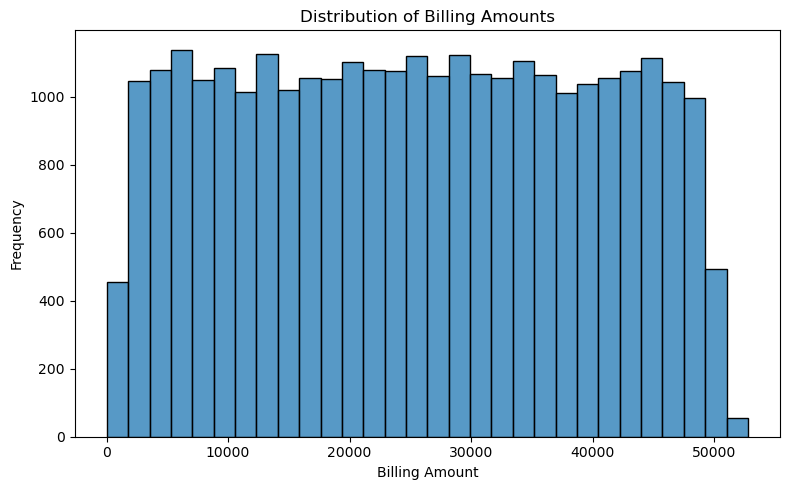

In [93]:
plt.figure(figsize=(8,5))
sns.histplot(df["Billing Amount"], bins=30)
plt.title("Distribution of Billing Amounts")
plt.xlabel("Billing Amount")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

The histogram shows that the billing amounts are spread fairly evenly across the entire range, indicating an approximately uniform distribution.

### Figure #2 - Billing amount by admission type (Box Plot)

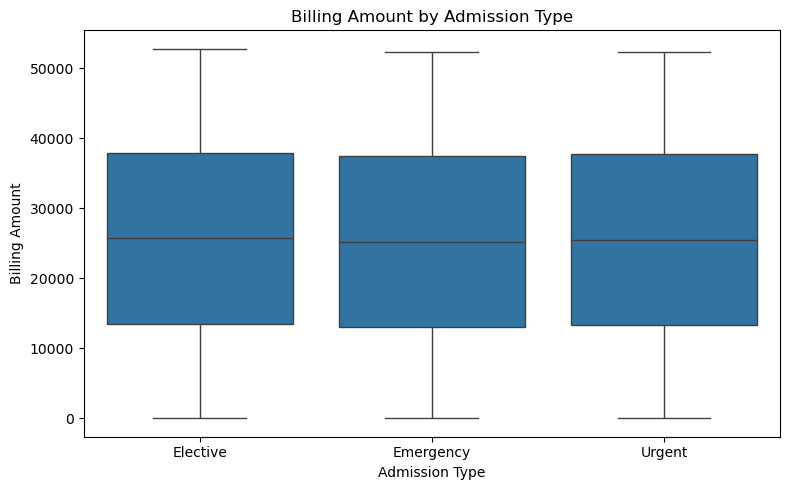

In [94]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Admission Type", y="Billing Amount")
plt.title("Billing Amount by Admission Type")
plt.xlabel("Admission Type")
plt.ylabel("Billing Amount")
plt.tight_layout()
plt.show()

Urgent, emergency, and elective admissions all have similar billing distributions. Indicating that admission type does not change billing cost patterns.

### Figure #3 - Monthly Average Billing Amount Over Time (Line Chart)

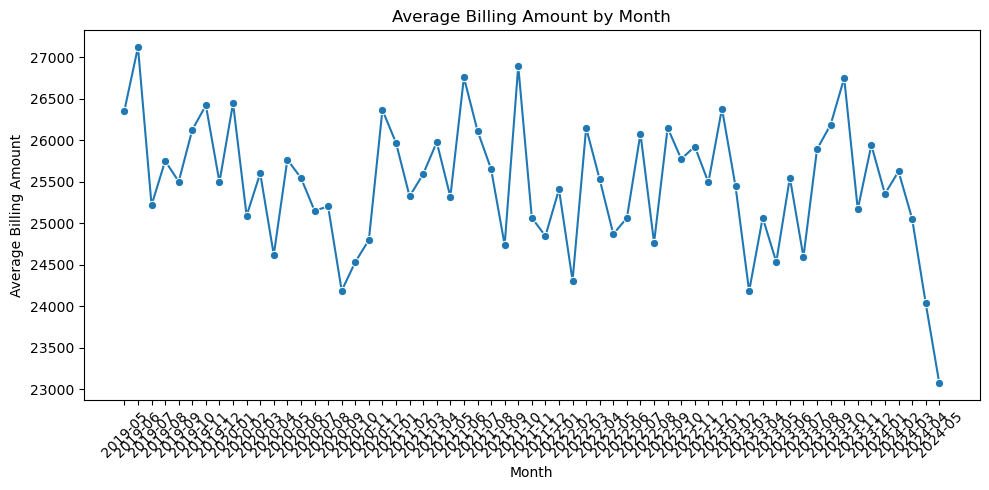

In [95]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])

monthly_avg = (
    df.groupby(df["Date of Admission"].dt.to_period("M"))["Billing Amount"]
      .mean()
      .reset_index()
      .rename(columns={"Date of Admission": "Month", "Billing Amount": "Avg Billing"})
)

monthly_avg["Month"] = monthly_avg["Month"].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_avg, x="Month", y="Avg Billing", marker="o")
plt.title("Average Billing Amount by Month")
plt.xlabel("Month")
plt.ylabel("Average Billing Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Monthly average billing amounts fluctuate over time but remain within a narrow range.

### Figure #4 - Scatter Plot of Age vs Billing Amount (Made from a 5% random sample)

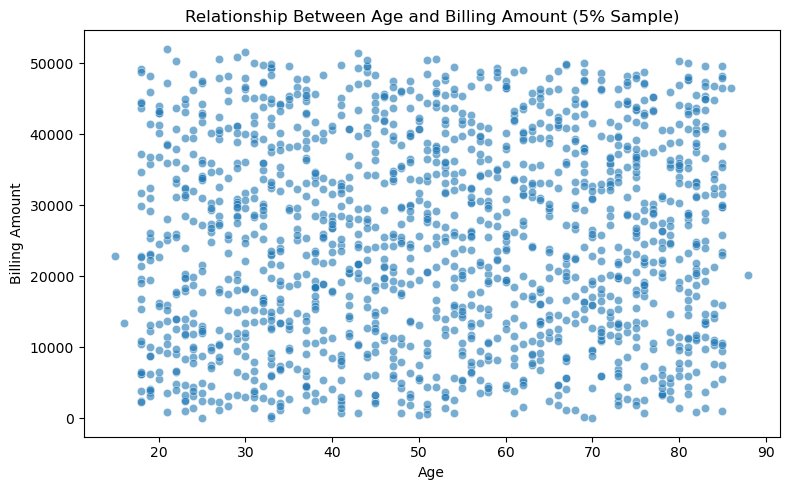

In [96]:
sample_df = df.sample(frac=0.05, random_state=42)

plt.figure(figsize=(8,5))
sns.scatterplot(data=sample_df, x="Age", y="Billing Amount", alpha=0.6)
plt.title("Relationship Between Age and Billing Amount (5% Sample)")
plt.xlabel("Age")
plt.ylabel("Billing Amount")
plt.tight_layout()
plt.show()

There is no clear relationship between age and billing amount, indiciating that patient age does not strongly influence hopsital charges. 

### Figure #5 - Pie Chart of Admission Type

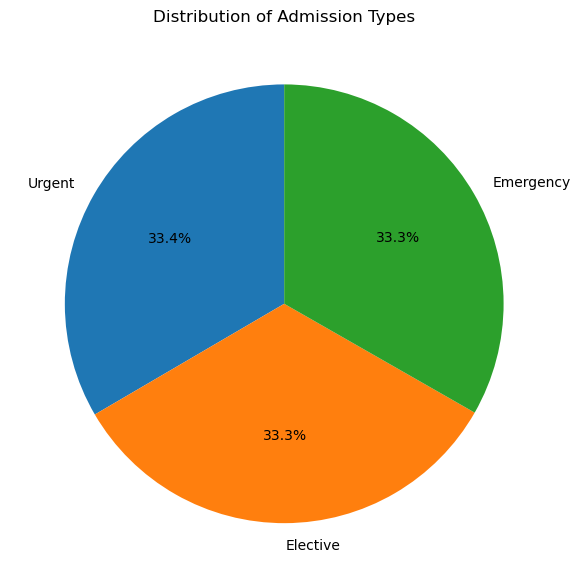

In [97]:
admission_counts = df["Admission Type"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    admission_counts.values,
    labels=admission_counts.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Distribution of Admission Types")
plt.tight_layout()
plt.show()

The distribution of admission types shows how patients are split among emergency, urgent, and elective admissions.